In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re


In [2]:
df=pd.read_csv("~/Downloads/summary.csv",sep=",")


In [3]:
sns.set(style="whitegrid")

In [4]:
df["name"]
df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'dockQ',
       'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long', 'med',
       'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA', 'longB',
       'medB', 'longPPVB', 'medPPVB', 'auc', 'evalue', 'seqid', 'rank'],
      dtype='object')

In [5]:

df["code"]=df["name"].str[:4]
df["CODE"]=df["code"]
df["params"]=df["JHparams"]

In [6]:
r=re.compile("^PDB|^pdb|^TMd|gramm")
datasets=df.JHparams.unique()
notRosettaset=list(filter(r.match, datasets))
df2=df.loc[~df.JHparams.isin(notRosettaset)].copy()
df2.JHparams="trRosetta"
df2

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,medB,longPPVB,medPPVB,auc,evalue,seqid,rank,code,CODE,params
0,1ay7_u1_A-1ay7_u2_A,trRosetta,97,90,1060.0,1485,2034,0.298,0.222,3.561,...,116,0.985,0.966,0.40,9999.0,0.000,1,1ay7,1ay7,-N 3 --cpu 8
1,1ay7_u2_A-1ay7_u1_A,trRosetta,90,97,1060.0,2034,1485,0.254,0.278,4.395,...,150,0.960,0.987,0.36,9999.0,0.000,2,1ay7,1ay7,-N 3 --cpu 8
2,1b27_u1_A-1b27_u2_A,trRosetta,109,90,733.0,1484,2034,0.223,0.120,4.508,...,113,0.992,0.965,0.46,4.3,50.000,1,1b27,1b27,-N 3 --cpu 8
3,1b27_u2_A-1b27_u1_A,trRosetta,90,109,733.0,2034,1484,0.231,0.160,4.840,...,154,0.971,0.981,0.46,4.3,50.000,2,1b27,1b27,-N 3 --cpu 8
4,1bdj_u1_A-1bdj_u2_A,trRosetta,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,92,0.996,1.000,0.00,9999.0,0.000,1,1bdj,1bdj,-N 3 --cpu 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6050,4y5o_u1_A-4y5o_u2_A,trRosetta,94,85,34.0,NaN,NaN,0.055,0.000,11.394,...,41,0.972,0.951,0.00,9999.0,0.000,1,4y5o,4y5o,rbh
6051,4zfr_u1_A-4zfr_u2_A,trRosetta,186,77,12.0,NaN,NaN,0.048,0.000,14.464,...,37,0.846,0.946,0.09,9999.0,0.000,1,4zfr,4zfr,rbh
6052,5brr_u1_A-5brr_u2_A,trRosetta,378,266,107.0,NaN,NaN,0.009,0.000,18.458,...,306,0.995,1.000,0.00,236.0,66.667,1,5brr,5brr,rbh
6053,5cec_u1_A-5cec_u2_A,trRosetta,403,191,7.0,NaN,NaN,0.011,0.000,20.074,...,109,0.737,0.367,0.00,197.0,33.333,1,5cec,5cec,rbh


In [7]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-C', 'PDBNEWDOCK-D', 'pdbsurface', 'rbh-jh',
       'rbh-merged-pdb', 'rbh', 'TMdock-nohomology-1.e-5',
       'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta'],
      dtype=object)

In [8]:
# Divide data into datasets


df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)
df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)
df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)
df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)
df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)
df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)
df["numcorrect"]=df["longPPV"]*df["long"]
df["len"]=df["lenA"]+df["lenB"]

codes=df.code.unique()
df_mean=df.groupby(["JHparams","code"]).mean()
df_max=df.groupby(["JHparams","code"]).max()
df_min=df.groupby(["JHparams","code"]).min()
df_first=df.loc[df["rank"]==1]

In [9]:
df


,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
0,1ay7_u1_A-1ay7_u2_A,-N 3 --cpu 8,97,90,1060.0,1485,2034,0.298,0.222,3.561,...,1ay7,-N 3 --cpu 8,0.828190,NaN,0.84625,2034,0.81013,1485,53.985,187
1,1ay7_u2_A-1ay7_u1_A,-N 3 --cpu 8,90,97,1060.0,2034,1485,0.254,0.278,4.395,...,1ay7,-N 3 --cpu 8,0.816405,NaN,0.84123,2034,0.79158,1485,43.992,187
2,1b27_u1_A-1b27_u2_A,-N 3 --cpu 8,109,90,733.0,1484,2034,0.223,0.120,4.508,...,1b27,-N 3 --cpu 8,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
3,1b27_u2_A-1b27_u1_A,-N 3 --cpu 8,90,109,733.0,2034,1484,0.231,0.160,4.840,...,1b27,-N 3 --cpu 8,0.805310,NaN,0.82261,2034,0.78801,1484,46.020,199
4,1bdj_u1_A-1bdj_u2_A,-N 3 --cpu 8,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,1bdj,-N 3 --cpu 8,0.861435,NaN,0.92240,349880,0.80047,23051,0.000,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18324,4y5o_u1_A-4y5o_u2_A,trRosetta,94,85,34.0,NaN,NaN,0.055,0.000,11.394,...,4y5o,rbh,0.568465,NaN,0.71099,None,0.42594,None,0.000,179
18325,4zfr_u1_A-4zfr_u2_A,trRosetta,186,77,12.0,NaN,NaN,0.048,0.000,14.464,...,4zfr,rbh,0.505235,NaN,0.64391,None,0.36656,None,3.000,263
18326,5brr_u1_A-5brr_u2_A,trRosetta,378,266,107.0,NaN,NaN,0.009,0.000,18.458,...,5brr,rbh,0.332210,NaN,0.38444,None,0.27998,None,468.000,644
18327,5cec_u1_A-5cec_u2_A,trRosetta,403,191,7.0,NaN,NaN,0.011,0.000,20.074,...,5cec,rbh,0.508770,NaN,0.70983,None,0.30771,None,2.006,594


In [10]:
datasets=df.JHparams.unique()
data_mean={}
data_max={}
data_min={}
for d in datasets:
    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()
    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()
    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()


In [11]:
df.loc[ (df.JHparams=="trRosetta")  & (df["rank"]==1)]

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
14745,1ay7_u1_A-1ay7_u2_A,trRosetta,97,90,1060.0,1485,2034,0.298,0.222,3.561,...,1ay7,-N 3 --cpu 8,0.828190,NaN,0.84625,2034,0.81013,1485,53.985,187
14747,1b27_u1_A-1b27_u2_A,trRosetta,109,90,733.0,1484,2034,0.223,0.120,4.508,...,1b27,-N 3 --cpu 8,0.824750,NaN,0.85428,2034,0.79522,1484,49.025,199
14749,1bdj_u1_A-1bdj_u2_A,trRosetta,129,118,5651.0,349880,23051,0.000,0.000,211.527,...,1bdj,-N 3 --cpu 8,0.861435,NaN,0.92240,349880,0.80047,23051,0.000,247
14751,1buh_u1_A-1buh_u2_A,trRosetta,291,72,1177.0,555226,1820,0.000,0.000,523.917,...,1buh,-N 3 --cpu 8,0.560760,NaN,0.73259,555226,0.38893,1820,0.000,363
14753,1bvn_u1_A-1bvn_u2_A,trRosetta,496,75,95.0,52623,123,0.006,0.000,27.357,...,1bvn,-N 3 --cpu 8,0.619740,NaN,0.70905,52623,0.53043,123,0.000,571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18324,4y5o_u1_A-4y5o_u2_A,trRosetta,94,85,34.0,NaN,NaN,0.055,0.000,11.394,...,4y5o,rbh,0.568465,NaN,0.71099,None,0.42594,None,0.000,179
18325,4zfr_u1_A-4zfr_u2_A,trRosetta,186,77,12.0,NaN,NaN,0.048,0.000,14.464,...,4zfr,rbh,0.505235,NaN,0.64391,None,0.36656,None,3.000,263
18326,5brr_u1_A-5brr_u2_A,trRosetta,378,266,107.0,NaN,NaN,0.009,0.000,18.458,...,5brr,rbh,0.332210,NaN,0.38444,None,0.27998,None,468.000,644
18327,5cec_u1_A-5cec_u2_A,trRosetta,403,191,7.0,NaN,NaN,0.011,0.000,20.074,...,5cec,rbh,0.508770,NaN,0.70983,None,0.30771,None,2.006,594


In [12]:
df.JHparams.unique()

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-C', 'PDBNEWDOCK-D', 'pdbsurface', 'rbh-jh',
       'rbh-merged-pdb', 'rbh', 'TMdock-nohomology-1.e-5',
       'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta'],
      dtype=object)

In [13]:
data_first={}
data_second={}
for d in datasets:
    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]
    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]
data_first[datasets[4]]

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
3276,1ay7_u1_A-1ay7_u2_A,ispred,97,90,1060.0,NaN,NaN,0.002,0.000,61.855,...,1ay7,ispred,0.994065,NaN,0.99507,None,0.99306,None,0.0,187
3277,1bdj_u1_A-1bdj_u2_A,ispred,129,118,5651.0,NaN,NaN,0.016,0.000,11.709,...,1bdj,ispred,0.930760,NaN,0.93447,None,0.92705,None,0.0,247
3278,1ewy_u1_A-1ewy_u2_A,ispred,304,99,4396.0,NaN,NaN,0.000,0.000,290.010,...,1ewy,ispred,0.980285,NaN,0.98997,None,0.97060,None,0.0,403
3279,1lb2_u1_A-1lb2_u2_A,ispred,210,82,5979.0,NaN,NaN,0.057,0.000,10.209,...,1lb2,ispred,0.929120,NaN,0.95046,None,0.90778,None,0.0,292
3280,2a41_u1_A-2a41_u2_A,ispred,373,259,7970.0,NaN,NaN,0.000,0.000,523.966,...,2a41,ispred,0.922585,NaN,0.97617,None,0.86900,None,0.0,632
3281,2ejf_u1_A-2ejf_u2_A,ispred,235,71,7710.0,NaN,NaN,0.011,0.000,19.774,...,2ejf,ispred,0.577170,NaN,0.91178,None,0.24256,None,0.0,306
3282,2grx_u1_A-2grx_u2_A,ispred,708,91,3344.0,NaN,NaN,0.000,0.000,700.517,...,2grx,ispred,0.126230,NaN,0.20871,None,0.04375,None,0.0,799
3283,2hqs_u1_A-2hqs_u2_A,ispred,398,109,2460.0,NaN,NaN,0.000,0.000,687.693,...,2hqs,ispred,0.979900,NaN,0.99676,None,0.96304,None,0.0,507
3284,2o8v_u1_A-2o8v_u2_A,ispred,216,109,8142.0,NaN,NaN,0.000,0.000,375.695,...,2o8v,ispred,0.980065,NaN,0.98512,None,0.97501,None,0.0,325
3285,3d3c_u1_A-3d3c_u2_A,ispred,140,81,6895.0,NaN,NaN,0.052,0.015,10.793,...,3d3c,ispred,0.889190,NaN,0.95994,None,0.81844,None,0.0,221


In [14]:
datasets


array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-C', 'PDBNEWDOCK-D', 'pdbsurface', 'rbh-jh',
       'rbh-merged-pdb', 'rbh', 'TMdock-nohomology-1.e-5',
       'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta'],
      dtype=object)

In [15]:
df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
df_max

CODE      LRMS   auc  dockQ  evalue   fnat  \
JHparams                code                                               
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7    44.621  0.09  0.044  9999.0  0.083   
                        1b27  1b27   197.381  0.00  0.008     4.3  0.000   
                        1bdj  1bdj    35.086  0.00  0.024  9999.0  0.000   
                        1buh  1buh   982.230  0.00  0.061    17.0  0.000   
                        1bvn  1bvn    40.949  0.00  0.038     2.3  0.000   
...                            ...       ...   ...    ...     ...    ...   
trRosetta               4zfr  4zfr   659.927  0.09  0.048  9999.0  0.000   
                        5brr  5brr  1343.860  0.00  0.035   236.0  0.073   
                        5cec  5cec  1486.764  0.02  0.050   197.0  0.075   
                        5cra  5cra    60.172  0.17  0.103  9999.0  0.000   
                        5eg3  5eg3  1105.630  0.00  0.016    68.0  0.000   

                              fnonnat     iRMS  len  lenA  ...  \
JHparams                code                               ...   
-N 1 -E 1.e-10 --cpu 8  1ay7      1.0   15.615  187    97  ...   
                        1b27      0.0   99.396  199   109  ...   
                        1bdj      1.0   17.785  247   129  ...   
                        1buh      1.0  491.316  363   291  ...   
                        1bvn      1.0   19.311  571   496  ...   
...                               ...      ...  ...   ...  ...   
trRosetta               4zfr      1.0  291.376  263   186  ...   
                        5brr      1.0  642.702  644   378  ...   
                        5cec      1.0  732.223  594   403  ...   
                        5cra      1.0   22.323  270   193  ...   
                        5eg3      1.0  542.531  408   303  ...   

                                             name  numcorrect  \
JHparams                code                                    
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A       0.000   
                        1b27  1b27_u2_A-1b27_u1_A       0.000   
                        1bdj  1bdj_u2_A-1bdj_u1_A       0.000   
                        1buh  1buh_u2_A-1buh_u1_A       0.000   
                        1bvn  1bvn_u2_A-1bvn_u1_A       0.000   
...                                           ...         ...   
trRosetta               4zfr  4zfr_u2_A-4zfr_u1_A       3.000   
                        5brr  5brr_u2_A-5brr_u1_A     468.000   
                        5cec  5cec_u2_A-5cec_u1_A       2.006   
                        5cra  5cra_u2_A-5cra_u1_A       3.003   
                        5eg3  5eg3_u2_A-5eg3_u1_A       0.000   

                                               params  rank   seqid      tmA  \
JHparams                code                                                   
-N 1 -E 1.e-10 --cpu 8  1ay7  -N 1 -E 1.e-10 --cpu 8      2   0.000  0.56969   
                        1b27  -N 1 -E 1.e-10 --cpu 8      2  50.000  0.65909   
                        1bdj  -N 1 -E 1.e-10 --cpu 8      2   0.000  0.84722   
                        1buh  -N 1 -E 1.e-10 --cpu 8      2  16.667  0.70255   
                        1bvn  -N 1 -E 1.e-10 --cpu 8      2  31.250  0.29684   
...                                               ...   ...     ...      ...   
trRosetta               4zfr                   rbh-jh     2   0.000  0.90969   
                        5brr                   rbh-jh     5  66.667  0.85257   
                        5cec                      rbh     2  33.333  0.86787   
                        5cra               N1-top1000     2   0.000  0.91212   
                        5eg3                      rbh     2  40.000  0.85448   

                                  tmAB  tmAB_max  tmAB_min      tmB  
JHparams                code                                         
-N 1 -E 1.e-10 --cpu 8  1ay7  0.468725   0.56969   0.36776  0.40067  
                        1b27  0.662735   0.66638   0.65909  0.66638  
               

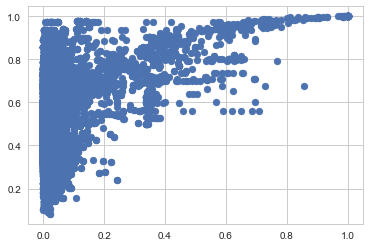

In [16]:

plt.scatter(df.dockQ,df.mm)


Text(0, 0.5, 'dockQ')

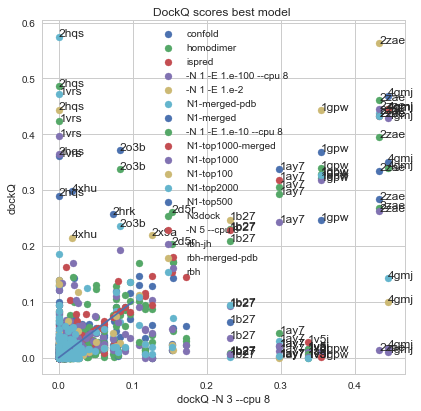

In [17]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    if d=="trRosetta":continue   
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4] # +d
        except:
            sstr=df_merged.name_y[i][0:4] #+d
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.1]
y=[0,0.1]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores best model ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'numcorrect')

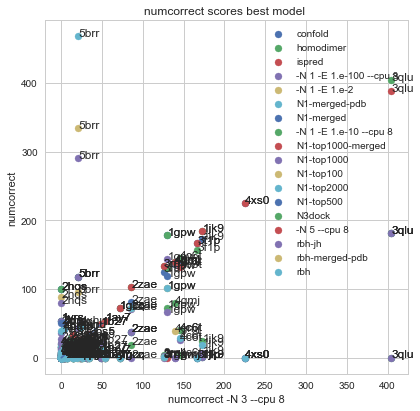

In [18]:
cutoff=5
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue 
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.numcorrect_x,df_merged.numcorrect_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.numcorrect_x[i]> cutoff or df_merged.numcorrect_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.numcorrect_x[i], df_merged.numcorrect_y[i]))
x=[0,50]
y=[0,50]
plt.plot(x,y)
ax.legend()
ax.set_title("numcorrect scores best model ")
ax.set_xlabel("numcorrect "+str(datasets[0]))
ax.set_ylabel("numcorrect")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

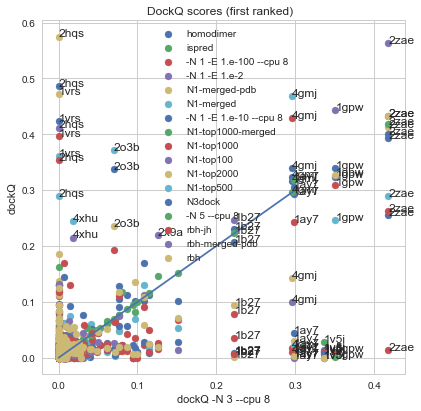

In [19]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

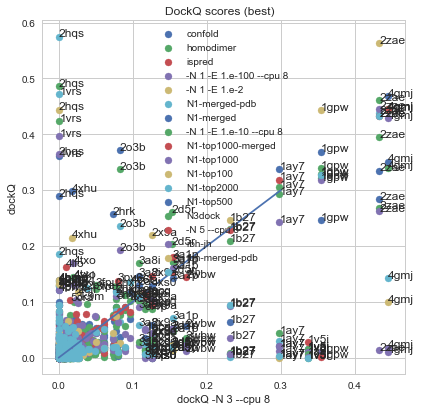

In [20]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

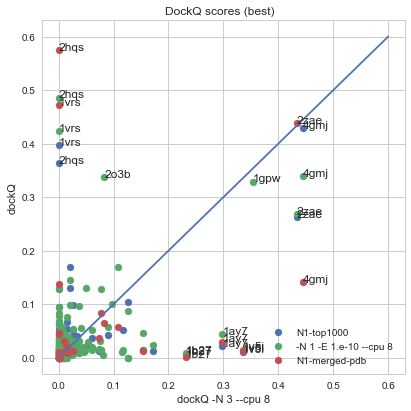

In [21]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-top1000","-N 1 -E 1.e-10 --cpu 8 ","N1-merged-pdb"]:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.6]
y=[0,0.6]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [22]:
data_max.keys()

dict_keys(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb', 'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D', 'pdbsurface', 'rbh-jh', 'rbh-merged-pdb', 'rbh', 'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta'])

Text(0, 0.5, 'dockQ trRosetta')

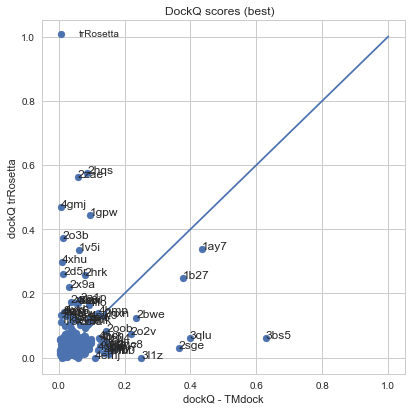

In [23]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-double"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - TMdock")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ trRosetta')

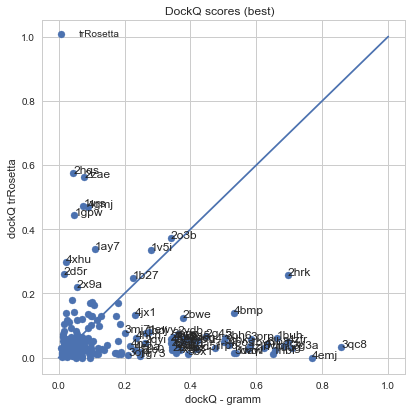

In [24]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(17.200000000000003, 0.5, 'dockQ TMdock')

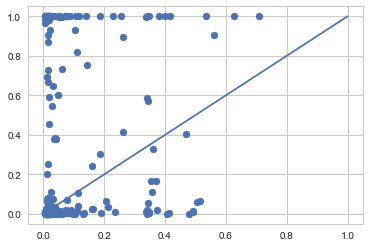

In [25]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(17.200000000000003, 0.5, 'dockQ TMdock-nohomology')

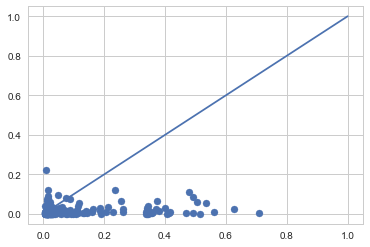

In [26]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-nohomology"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock-nohomology")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

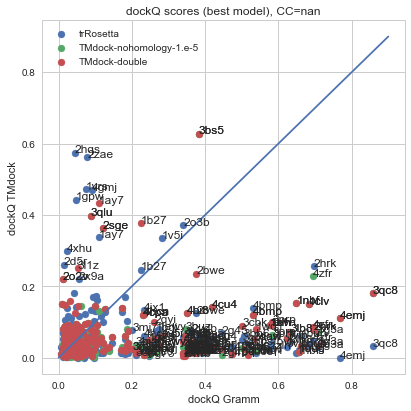

In [27]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta","TMdock-nohomology-1.e-5","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

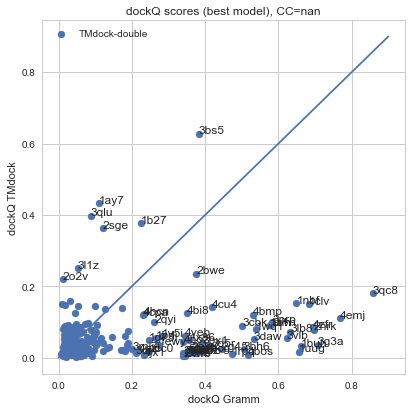

In [28]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

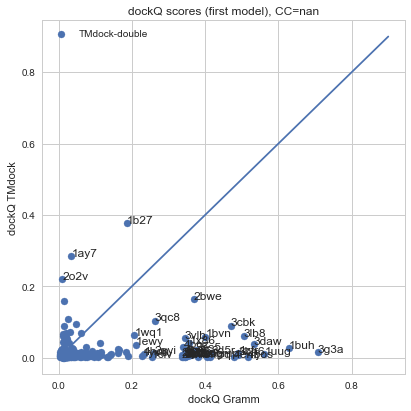

In [29]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock TMdock-double')

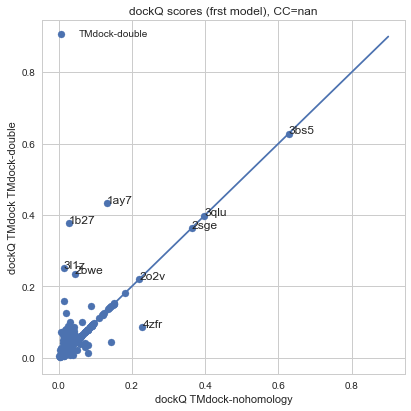

In [30]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-nohomology-1.e-5"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock-nohomology")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock trRosetta')

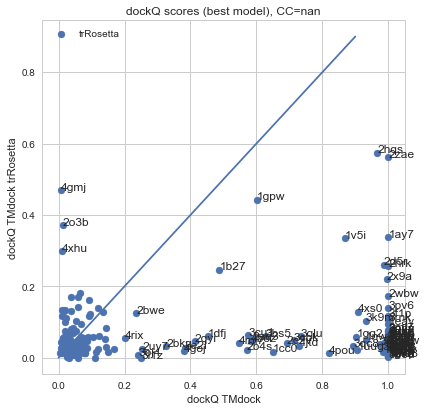

In [31]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  pdbsurface')

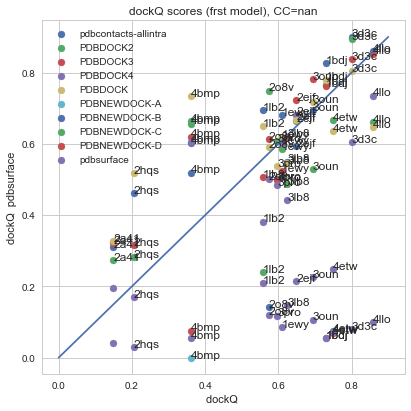

In [32]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDB|^pdb")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [33]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()


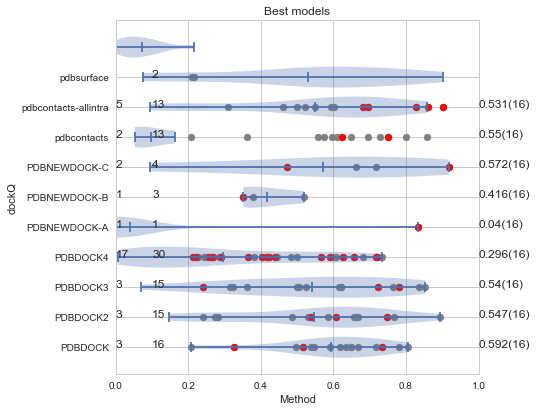

In [34]:
# FInd best method for each model.
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_xlabel("Method")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"
                    ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


In [35]:
best_df

,index,JHparams,code,CODE,LRMS,auc,dockQ,evalue,fnat,fnonnat,...,name,numcorrect,params,rank,seqid,tmA,tmAB,tmAB_max,tmAB_min,tmB
0,118,PDBNEWDOCK-C,1b27,1b27,0.463,0.02,0.919,4.300000e+00,0.800,0.298,...,1b27_u1_A-1b27_u2_A,0.0,PDBNEWDOCK-C,1,50.000,0.99490,0.995490,0.99608,0.99490,0.99608
1,307,pdbcontacts-allintra,3d3c,3d3c,1.100,0.10,0.901,2.700000e+01,0.776,0.154,...,3d3c_u2_A-3d3c_u1_A,0.0,pdbcontacts-allintra,2,66.667,0.99650,0.993340,0.99663,0.99018,0.99663
2,312,pdbcontacts-allintra,4llo,4llo,24.148,0.10,0.861,4.100000e+01,0.880,0.954,...,4llo_u2_A-4llo_u1_A,0.0,pdbcontacts-allintra,2,66.667,0.99052,0.985985,0.99052,0.98145,0.98643
3,113,PDBNEWDOCK-A,1gcq,1gcq,0.590,0.10,0.832,6.320000e-05,0.720,0.182,...,1gcq_u1_A-1gcq_u2_A,0.0,PDBNEWDOCK-A,1,31.707,0.97576,0.980100,0.98444,0.97576,0.98444
4,300,pdbcontacts-allintra,1bdj,1bdj,36.464,0.07,0.827,9.999000e+03,0.765,0.994,...,1bdj_u2_A-1bdj_u1_A,0.0,pdbcontacts-allintra,2,0.000,0.96309,0.973870,0.98465,0.96309,0.98465
5,78,PDBDOCK3,3oun,3oun,49.472,0.07,0.781,4.800000e+01,0.750,0.985,...,3oun_u2_A-3oun_u1_A,0.0,PDBDOCK3,2,33.333,0.96593,0.948065,0.96593,0.93020,0.93138
6,298,pdbcontacts,4etw,4etw,36.215,0.07,0.750,9.999000e+03,0.679,0.996,...,4etw_u2_A-4etw_u1_A,0.0,pdbcontacts,2,0.000,0.98540,0.951340,0.98540,0.93328,0.96604
7,60,PDBDOCK2,2o8v,2o8v,1.555,0.07,0.749,4.200000e+01,0.667,0.250,...,2o8v_u2_A-2o8v_u1_A,0.0,PDBDOCK2,2,25.000,0.97368,0.976405,0.97913,0.97368,0.97913
8,49,PDBDOCK,4bmp,4bmp,30.209,0.03,0.734,9.500000e+00,0.691,0.987,...,4bmp_u2_A-4bmp_u1_A,0.0,PDBDOCK,2,23.810,0.94179,0.945215,0.94864,0.94179,0.94864
9,73,PDBDOCK3,2ejf,2ejf,24.792,0.06,0.722,9.800000e+00,0.694,0.937,...,2ejf_u2_A-2ejf_u1_A,0.0,PDBDOCK3,2,42.857,0.89473,0.942515,0.99030,0.89473,0.99030


In [36]:
codes

array(['1bdj', '1ewy', '1jtd', '1lb2', '2a41', '2ejf', '2hqs', '2o8v',
       '3d3c', '3lb8', '3oun', '3pro', '4bmp', '4etw', '4llo', '5brr',
       '1ay7', '1b27', '1bvn', '1gcq', '1gpw', '1he1', '1i4e', '1i8l',
       '1jiw', '1k5g', '1nql', '1vg0', '2aq3', '2b4s', '2d5r', '2grx',
       '2hj9', '2hrk', '2ido', '2nqd', '2nxn', '2o3b', '2sge', '2wbw',
       '2x9a', '2xwb', '2zae', '3a1p', '3a8i', '3bs5', '3buz', '3cw2',
       '3fpu', '3lwn', '3ona', '3rnk', '3vlb', '5eg3', '3wkt', '4gmj'],
      dtype=object)

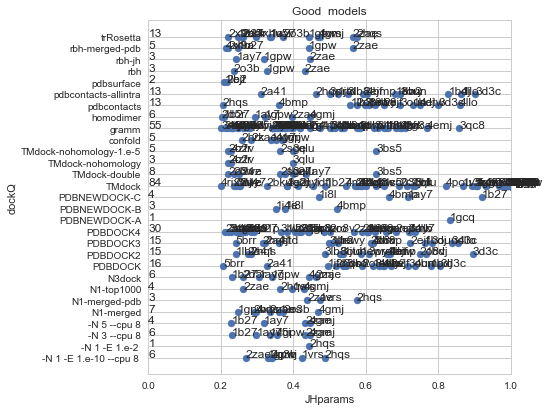

In [37]:

f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

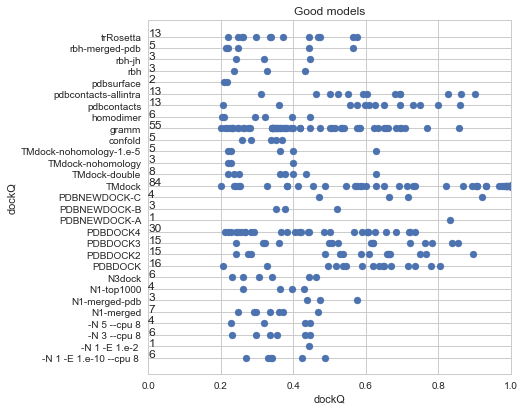

In [38]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

In [39]:
datasets

array(['-N 3 --cpu 8', 'confold', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 5 --cpu 8', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2',
       'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B',
       'PDBNEWDOCK-C', 'PDBNEWDOCK-D', 'pdbsurface', 'rbh-jh',
       'rbh-merged-pdb', 'rbh', 'TMdock-nohomology-1.e-5',
       'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta'],
      dtype=object)

In [40]:
# here we find what method is best for each target

r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print(excludecolumns)
excludecolumns+=["confold","rbh-merged-pdb"]
tempdf=newdf.loc[~newdf.JHparams.isin(excludecolumns)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

['gramm', 'pdbcontacts-allintra', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-A', 'PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D', 'pdbsurface', 'TMdock-nohomology-1.e-5', 'TMdock-double', 'TMdock-nohomology', 'TMdock', 'trRosetta']


,index,JHparams,code,CODE,LRMS,auc,dockQ,evalue,fnat,fnonnat,...,name,numcorrect,params,rank,seqid,tmA,tmAB,tmAB_max,tmAB_min,tmB
5,9,-N 3 --cpu 8,1gpw,1gpw,8.042,0.45,0.354,149.0,0.320,0.722,...,1gpw_u2_A-1gpw_u1_A,130.000,-N 3 --cpu 8,2,66.667,0.89229,0.888935,0.89468,0.88319,0.89468
6,10,-N 3 --cpu 8,1v5i,1v5i,304.329,0.16,0.336,9999.0,0.191,0.250,...,1v5i_u2_A-1v5i_u1_A,1.000,-N 3 --cpu 8,2,0.000,0.88557,0.826270,0.89294,0.75960,0.89294
10,8,-N 3 --cpu 8,1b27,1b27,9.459,0.46,0.231,4.3,0.160,0.455,...,1b27_u2_A-1b27_u1_A,49.025,-N 3 --cpu 8,2,50.000,0.85428,0.824750,0.85428,0.79522,0.82261
7,13,-N 5 --cpu 8,1ay7,1ay7,11.298,0.40,0.319,9999.0,0.278,0.375,...,1ay7_u2_A-1ay7_u1_A,53.985,-N 5 --cpu 8,2,0.000,0.84065,0.830380,0.84095,0.81981,0.84095
2,22,N1-merged,4gmj,4gmj,11.965,0.18,0.469,114.0,0.780,0.780,...,4gmj_u2_A-4gmj_u1_A,137.151,N1-merged,2,50.000,0.81483,0.796040,0.82633,0.77031,0.82633
4,20,N1-merged,2o3b,2o3b,33.091,0.29,0.372,59.0,0.556,0.975,...,2o3b_u2_A-2o3b_u1_A,29.008,N1-merged,2,50.000,0.83406,0.727490,0.83406,0.62495,0.82514
8,23,N1-merged,4xhu,4xhu,12.250,0.07,0.298,17.0,0.481,0.773,...,4xhu_u2_A-4xhu_u1_A,19.910,N1-merged,2,44.444,0.84232,0.829155,0.84232,0.81599,0.83902
0,25,N1-merged-pdb,2hqs,2hqs,36.870,0.38,0.575,45.0,0.526,0.655,...,2hqs_u2_A-2hqs_u1_A,100.035,N1-merged-pdb,2,20.000,0.97016,0.969605,0.97016,0.96905,0.96905
1,24,N1-merged-pdb,1vrs,1vrs,11.866,0.49,0.472,3.0,0.449,0.300,...,1vrs_u2_A-1vrs_u1_A,53.988,N1-merged-pdb,2,38.462,0.99288,0.989810,0.99288,0.98674,0.98674
3,35,N3dock,2zae,2zae,4.960,0.49,0.461,9999.0,0.484,0.406,...,2zae_u2_A-2zae_u1_A,103.041,N3dock,2,0.000,0.79343,0.792020,0.79343,0.79061,0.79061


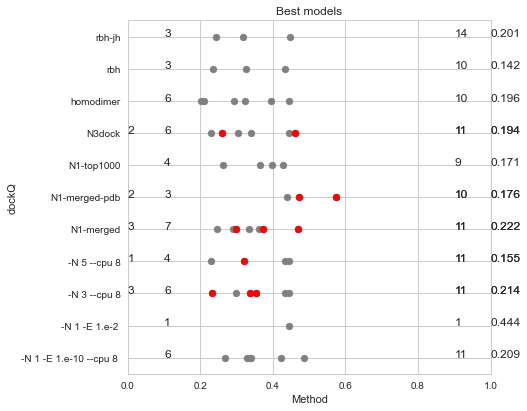

In [41]:
# FInd best method for each model.
codes=best_df["code"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
good_df=newdf.loc[(newdf.code.isin(codes))&(~newdf.JHparams.isin(excludecolumns))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_xlabel("Method")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
for d in datasets:
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3)),(1.0, best_df.JHparams[i]))
        ax.annotate(str(length[best_df.JHparams[i]]),(.9, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        ax.annotate(str(length[good_df.JHparams[i]]),(.9, good_df.JHparams[i]))


In [42]:
df.sort_values('dockQ', ascending=False).drop_duplicates(["code"])

,name,JHparams,lenA,lenB,msa,msaA,msaB,dockQ,fnat,iRMS,...,CODE,params,tmAB,msaAB,tmAB_max,msaAB_max,tmAB_min,msaAB_min,numcorrect,len
13126,1zlh_u1_A-1zlh_u2_A,TMdock,306,76,NaN,NaN,NaN,1.000,1.0,0.000,...,1zlh,TMdock,1.00000,NaN,1.00000,None,1.00000,None,0.000,382
13376,2nqd_u1_A-2nqd_u2_A,TMdock,221,111,NaN,NaN,NaN,1.000,1.0,0.000,...,2nqd,TMdock,1.00000,NaN,1.00000,None,1.00000,None,6.000,332
14007,3rnk_u1_A-3rnk_u2_A,TMdock,113,105,NaN,NaN,NaN,1.000,1.0,0.000,...,3rnk,TMdock,1.00000,NaN,1.00000,None,1.00000,None,125.292,218
13786,3k1i_u1_A-3k1i_u2_A,TMdock,116,102,NaN,NaN,NaN,1.000,1.0,0.000,...,3k1i,TMdock,1.00000,NaN,1.00000,None,1.00000,None,6.996,218
13807,3kld_u1_A-3kld_u2_A,TMdock,384,265,NaN,NaN,NaN,1.000,1.0,0.000,...,3kld,TMdock,1.00000,NaN,1.00000,None,1.00000,None,0.000,649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,4v2c_u1_A-4v2c_u2_A,gramm,324,107,NaN,NaN,NaN,0.019,0.0,14.698,...,4v2c,gramm,1.00000,NaN,1.00000,None,1.00000,None,0.000,431
18015,3wkt_u2_A-3wkt_u1_A,trRosetta,215,604,611.0,NaN,NaN,0.018,0.0,21.556,...,3wkt,rbh-jh,0.66127,NaN,0.82042,None,0.50212,None,0.000,819
6885,2o25_u1_A-2o25_u2_A,TMdock-nohomology-1.e-5,202,160,NaN,NaN,NaN,0.016,0.0,9.498,...,2o25,TMdock-nohomology-1.e-5,1.00000,NaN,1.00000,None,1.00000,None,0.000,362
6455,1te1_u1_A-1te1_u2_A,TMdock-nohomology-1.e-5,275,191,NaN,NaN,NaN,0.016,0.0,16.409,...,1te1,TMdock-nohomology-1.e-5,1.00000,NaN,1.00000,None,1.00000,None,0.000,466


In [43]:
df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("name").max()


,JHparams,lenA,lenB,msa,dockQ,fnat,iRMS,LRMS,fnonnat,mm,...,rank,code,CODE,params,tmAB,msaAB,tmAB_max,tmAB_min,numcorrect,len
name,,,,,,,,,,,,,,,,,,,,,
1ay7_u1_A-1ay7_u2_A,rbh-jh,97,90,1060.0,0.319,0.306,4.002,9.104,0.615,0.73405,...,1,1ay7,1ay7,rbh-jh,0.830380,NaN,0.84625,0.81981,53.985,187
1ay7_u2_A-1ay7_u1_A,homodimer,90,97,1060.0,0.260,0.306,4.395,11.298,0.333,0.69871,...,2,1ay7,1ay7,homodimer,0.817620,NaN,0.84181,0.79459,43.992,187
1b27_u1_A-1b27_u2_A,homodimer,109,90,733.0,0.230,0.160,4.787,10.176,0.455,0.69893,...,1,1b27,1b27,homodimer,0.825820,NaN,0.85658,0.79542,49.025,199
1b27_u2_A-1b27_u1_A,homodimer,90,109,733.0,0.231,0.160,5.319,9.542,0.562,0.68598,...,2,1b27,1b27,homodimer,0.810645,NaN,0.83444,0.78801,46.020,199
1gpw_u1_A-1gpw_u2_A,rbh-jh,252,204,7137.0,0.351,0.320,4.776,11.778,0.788,0.85956,...,1,1gpw,1gpw,rbh-jh,0.889680,NaN,0.89229,0.88822,179.000,456
1gpw_u2_A-1gpw_u1_A,rbh-jh,204,252,7137.0,0.354,0.333,5.865,9.606,0.776,0.86284,...,2,1gpw,1gpw,rbh-jh,0.894335,NaN,0.89745,0.89220,163.000,456
1v5i_u1_A-1v5i_u2_A,-N 3 --cpu 8,276,78,1922.0,0.336,0.191,3.748,5.851,0.250,0.83284,...,1,1v5i,1v5i,-N 3 --cpu 8,0.818890,NaN,0.88557,0.75221,1.000,354
1vrs_u1_A-1vrs_u2_A,N1-top1000,124,117,836.0,0.472,0.449,2.953,9.785,0.550,0.87361,...,1,1vrs,1vrs,N1-top1000,0.989810,NaN,0.99288,0.98674,53.988,241
1vrs_u2_A-1vrs_u1_A,N1-top1000,117,124,2091.0,0.295,0.286,7.831,11.866,0.524,0.77203,...,2,1vrs,1vrs,N1-top1000,0.897465,NaN,0.98730,0.81427,40.015,241


KeyError: 0

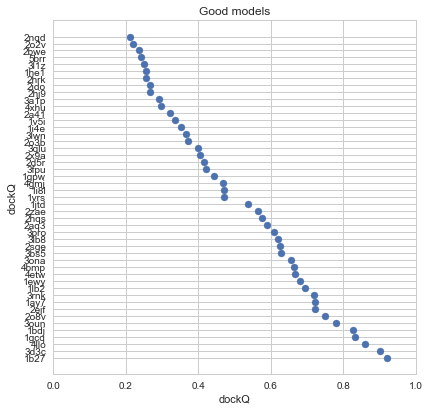

In [44]:
excludecolumns=["gramm","pdbcontacts","PDBDOCK","TMdock","trRosetta","TMdock-nohomology","TMdock-nohomology-1.e-5"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best methods")

#new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("code").max().reset_index()
new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"])

#print(newdf)
#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)
plt.scatter(new_df.dockQ,new_df.code)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(new_df.JHparams):
    #print (i,txt,newdf.dockQ[i], newdf.code[i])
    sstr=txt
    ax.annotate(sstr, (new_df.dockQ[i], new_df.code[i]))


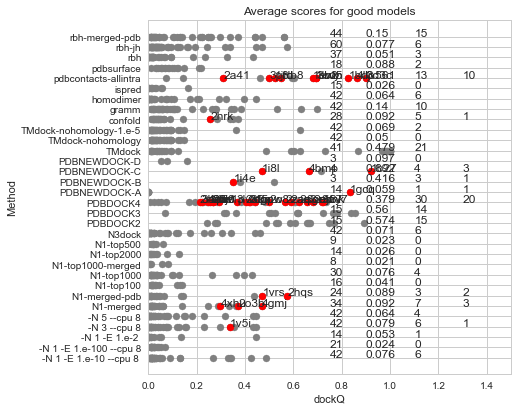

In [45]:
excludecolumns=["rbh-merged-pdb","gramm","pdbcontacts","pdbcontacts-1.e-5","PDBDOCK","PDBDOCK2","PDBDOCK3","TMdock","trRosetta","TMdock-nohomology","TMdock-double","TMdock-nohomology-1.e-5"]
includeTR=["pdbcontacts","PDBDOCK","TMdock-double"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best methods")

new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"]).reset_index()
codes=new_df.CODE.unique()
#print(new_df)
#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)

tempdf=df_max.loc[(df_max.CODE.isin(codes)) & (~df_max.params.isin(includeTR))].reset_index()
plt.scatter(tempdf.dockQ,tempdf.params,color="grey")
#print(tempdf[tempdf.params=="N1-top1000"])
plt.scatter(new_df.dockQ,new_df.params,color="red")
#print(new_df[new_df.params=="N1-top1000"])

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Average scores for good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("Method")
ax.set(xlim=[0,1])
done={}
average={}
length={}
ax.set(xlim=[0,1.5])
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
    average[d]=df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"])
for i, txt in enumerate(tempdf.name):
    #print (i,txt, newdf.JHparams[i])
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(tempdf.loc[(tempdf.params==tempdf.params[i])&(tempdf.dockQ>cutoff)])
    
    #print (numhit,newdf.JHparams[i])
    if done[tempdf.params[i]]==0:
        done[tempdf.params[i]]=1
        ax.annotate(str(numhit),(1.1, tempdf.params[i]))
        #ax.annotate("0",(.1, tempdf.JHparams[i]))  
        ax.annotate(str(round(average[tempdf.params[i]],3)),(.9, tempdf.params[i]))          
        ax.annotate(str(round(length[tempdf.params[i]],3)),(.75, tempdf.params[i]))  
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
for i, txt in enumerate(new_df.name):
    #print (i,txt,newdf.dockQ[i], newdf.JHparams[i])
    sstr=txt[0:4]
    ax.annotate(sstr, (new_df.dockQ[i], new_df.params[i]))
    numhit=len(new_df.loc[new_df.params==new_df.params[i]])
    #numhit2=len(tempdf.loc[tempdf.JHparams==tempdf.params[i]])
    #print (numhit,newdf.JHparams[i])
    if done[new_df.params[i]]==0:
        done[new_df.params[i]]=1
        ax.annotate(str(numhit),(1.3, new_df.params[i]))  
        #ax.annotate(str(numhit2),(-0.1, new_df.JHparams[i]))


In [ ]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="dockQ", hue="JHparams",
                    data=df, palette="muted")

In [ ]:
new_df

In [ ]:
newdf

In [ ]:
df_first["size"]=pd.qcut(df_first['msa'], q=4)
df_first["l"]=pd.qcut(df_first['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="dockQ", hue="JHparams",
                    data=df_first, palette="muted")

In [ ]:
df["size"]=pd.qcut(df['msa'], q=4)
df["l"]=pd.qcut(df['lenA'], q=1)

f, ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.violinplot(x="l", y="iRMS", hue="JHparams",
                    data=df_first, palette="muted")

In [ ]:
data_first[datasets[0]]

# TEST to do
# First ranked..
# U1 vs U2

In [ ]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    df_merged = pd.merge(data_max[d],data_first[d], on=['code'],how="inner")
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d+" "+str(round(cc[0,1],3)))
ax.set_title("first vs best model")
ax.set_xlabel("Best model")
ax.set_ylabel("First model")
ax.legend()



In [ ]:
datasets


In [ ]:
tempdf=data_max['-N 1 -E 1.e-10 --cpu 8 '] 

for y in ["numcorrect","msaAB","msa","tmAB","msa"]:
    for x in ["dockQ","tmAB","tmAB_min","mm",]:
        #print (Name)
         #if (Name != "lenA"):
        #    continue
        xdata=tempdf[x]
        ydata=tempdf[y]
        f, ax = plt.subplots(figsize=(6.5, 6.5))
        plt.scatter(xdata,ydata)
        cc=np.corrcoef(xdata,ydata)
        ax.set_title(x + " - " + y + " " + str(round(cc[0,1],3)))
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        for i, txt in enumerate(tempdf.name):
            sstr=txt[0:4]
            if (xdata[i]>cutoff or ydata[i]>25):
                ax.annotate(sstr, (xdata[i], ydata[i]))
    plt.close()

In [ ]:
print (codes)


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()


In [ ]:
ydata=df.dockQ

In [ ]:
xdata=df[["lenA","lenB","msa","long","med","longA","medA","longB","medB"]]


In [ ]:
reg.fit(xdata,ydata)

In [ ]:

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


In [ ]:
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
